# Geospatial Analytics with Python
<hr style="border:1px solid black"> </hr>

# 
Laian Abussaud

## Contents
<hr style="border:0.5px solid black"> </hr>


1. Definitions

2. Applications 

3. Comparison

4. Python

5. Demo

## Definitions
<hr style="border:0.5px solid black"> </hr>


#### What is GIS?

Geographic Informaton System, a system that allows you to visualize, analyze, and store data to understand <ins>spatial</ins> relationships, patterns, and trends.


#### What is Geospatial data?

Geospatial data is data about objects, events, or phenomena that has a <ins>location</ins>. Usually stored as coordinates (latitude, longtitude).


<img src="lat_long.png" style="width:750px;height:600px"/>

<img src="data_types_2.png" style="width:600px;height:600px"/>

#### What is Geospatial analysis?

A mix of data science, advanced analysis, and maps!


#### It helps us answer *Where* questions

- Where is?
- Where should we place?
- Where will the hurricane hit?
- Where should we place advertisements?

## Applications
<hr style="border:0.5px solid black"> </hr>


> "GIS is widely used in organizations of all sizes and in almost every industry."


Some GIS analysis applications include:
- Architecture/Urban planning
- Map Navigation
- Transportation Planning
- Accident/Hot Spot Analysis
- Aviation Applications
- Environmental Impact Analysis
- Agricultural Applications
- Astronomy Applications
- Disaster Management and Mitigation
- Water Management
- Banking (ATM Machines)
- etc.

## Comparision
<hr style="border:0.5px solid black"> </hr>


**Traditional Desktop GIS Software:**

Tools:
   - ArcGIS by Esri
   - QGIS
   
Pros:
   - Very good for cartography
   - Does not require coding
   - If you prefer GUI's
    
Cons:
   - Not great for big data
   - Not great for documentation
   - Not great for statistical analysis

**Geospatial Data Science Softwares:**
    
Tools:
   - Python
   - R
   
Pros:
   - Great for big data
   - Great for documentation
   - Great for statistical analysis
    
Cons:
   - Not good for cartography
   - Requires coding
   - Steeper learning curve

## Python
<hr style="border:0.5px solid black"> </hr>


### Base map packages:

- XYZ tiles, to provide the base map layer
- ex. **Folium** →  a python wrapper for Leaflet, to plot interactive maps

In [1]:
import folium

In [2]:
m = folium.Map(location=[24.78, 46.75], zoom_start=5, control_scale=True)
m

In [3]:
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

### Street Network packages:

- **NetworkX** →  Aric Hagberg, Pieter Swart, and Dan Schult	
- **Pandana** →  Fletcher Foti
- **OSMnx** →  Geoff Boeing

### Data manipulation packages:

- **Pandas**, for high-performance, easy-to-use data structures and data analysis tools
- **GeoPandas**, for Geographically-enabled Pandas, depends on <ins>Shapely</ins> and <ins>Fiona</ins>, it adds columns in Pandas for spatial operations

### OpenStreetMap (OSM):

<a href="https://www.openstreetmap.org/export#map=6/23.080/49.735">www.openstreetmap.org</a>

<a href="https://wiki.openstreetmap.org/wiki/Key:amenity">Key:amenity - OpenStreetMap Wiki</a>

<img src="OSM.jpg" style="width:1000px;height:500px"/>

<img src="osm_2.png" style="width:1000px;height:500px"/>

- Not just a map, it is a **Database**
- Open-source collaborative project
- Attributes saved as key-value pairs
- Amenity key

<img src="osm_3.png" style="width:1000px;height:500px"/>

## Demo
<hr style="border:0.5px solid black"> </hr>

#### Spatial Question: How accessible/walkable are the cafes in my district?

#### 0. Import python libraries:


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandana
from pandana.loaders import osm

#### 1. Specify OSM bounding box, amenity type and distance

In [5]:
bbox = [26.2841, 50.1995, 26.3366, 50.2454] # lat-long bounding box, [Bottom, Left, Top, Right]
amenity = 'cafe' # accessibility to this type of amenity
distance = 1500 # max distance in meters

#### 2. Download points of interest (POIs)

In [6]:
pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags='"amenity"="{}"'.format(amenity))
pois.tail()

,lat,lon,addr:street,amenity,name,name:en,addr:city,addr:postcode,cuisine,internet_access,opening_hours,outdoor_seating,smoking,cafe,contact:phone,contact:website,breakfast
id,,,,,,,,,,,,,,,,,
7875545143,26.317841,50.223092,NaN,cafe,Crafter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coffee,NaN,NaN,NaN
8691014370,26.302852,50.221981,NaN,cafe,Chemistry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+966 50 679 5999,https://ww.chemistrycoffeesa.com,NaN
8691017777,26.303705,50.222413,NaN,cafe,Caffe Vergnano 1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8691031854,26.303063,50.222318,NaN,cafe,Godiva Belgium 1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8691047267,26.304933,50.222543,NaN,cafe,Five Elephants,NaN,NaN,NaN,NaN,NaN,Not-So 06:00-23:00,NaN,NaN,NaN,NaN,NaN,yes


#### 3. Download street network data from OSM

In [7]:
# query the OSM API for the street network within the specified bbox
# need to install osmnet to download 
network = osm.pdna_network_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3])
len(network.node_ids)

C:\Users\HP OMEN\anaconda3\envs\geo_env\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
C:\Users\HP OMEN\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\HP OMEN\anaconda3\envs\geo_env\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs


Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](26.28410000,50.19950000,26.33660000,50.24540000);>;);out;'}"
Downloaded 690.9KB from www.overpass-api.de in 1.71 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 1.74 seconds
Returning OSM data with 5,263 nodes and 1,032 ways...
Edge node pairs completed. Took 4.68 seconds
Returning processed graph with 2,177 nodes and 3,517 edges...
Completed OSM data download and Pandana node and edge table creation in 6.72 seconds


2177

#### 4. Process the network data then compute accessibility

In [8]:
# identify nodes that are connected to fewer than some threshold of other nodes within a given distance
# do nothing with this for now, but see full example in other notebook for more
lcn = network.low_connectivity_nodes(impedance=1000, count=10, imp_name='distance')
# precomputes the range queries (the reachable nodes within this maximum distance)
# so, as long as you use a smaller distance, cached results will be used
network.precompute(distance + 1)
# initialize the underlying C++ points-of-interest engine
network.init_pois(num_categories=1, max_dist=distance, max_pois=7)
# initialize a category for this amenity with the locations specified by the lon and lat columns
network.set_pois(category='my_amenity', x_col=pois['lon'], y_col=pois['lat'])
# search for the n nearest amenities to each node in the network
access = network.nearest_pois(distance=distance, category='my_amenity', num_pois=7)
# each df cell represents the network distance from the node to each of the n POIs
access.head()

Reading parameters from init_pois()
Reading parameters from init_pois()


,1,2,3,4,5,6,7
id,,,,,,,
288061390,897.185974,958.093994,1040.521973,1074.296997,1309.385986,1500.0,1500.0
288061448,669.609009,703.383972,726.254028,883.414001,1421.446045,1500.0,1500.0
288061465,585.408020,619.182983,642.052979,799.213013,1500.000000,1500.0,1500.0
288061488,643.752991,726.181030,759.955994,800.913025,1372.689941,1500.0,1500.0
288061494,576.479980,658.908020,692.682983,733.640015,1439.963013,1500.0,1500.0


#### 5. Plot accessibility

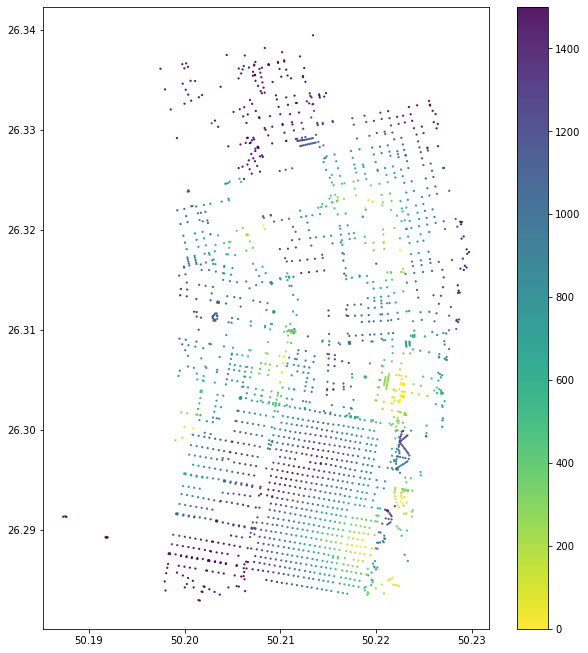

ValueError: not enough values to unpack (expected 3, got 2)

In [9]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (bbox[2] - bbox[0]) / (bbox[3] - bbox[1])
fig_kwargs = {'facecolor':'w', 
              'figsize':(10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {'s':5, 
               'alpha':0.9, 
               'cmap':'viridis_r', 
               'edgecolor':'none'}

# plot the distance to the nth nearest amenity
n = 1
bmap, fig, ax = network.plot(access[n], bbox=bbox, plot_kwargs=plot_kwargs, fig_kwargs=fig_kwargs)
ax.set_axis_bgcolor('k')
ax.set_title('Walking distance (m) to nearest {} around Al-Khobar, Saudi Arabia'.format(amenity), fontsize=15)
plt.show()

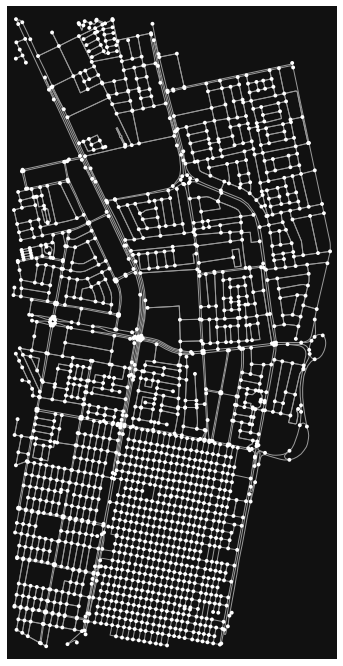

(<Figure size 432x864 with 1 Axes>, <AxesSubplot:>)

In [10]:
import osmnx as ox

G = ox.graph_from_bbox(26.3366, 26.2841, 50.2454, 50.1995, network_type='drive')
ox.plot_graph(G, figsize=(6, 12))

## Thank you for listening!

### Any questions?


## RISE settings

In [ ]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "serif",
            "transition": "fade",
            "start_slideshow_at": "beginning",
            "autolaunch": True,
            "width": "100%",
            "height": "100%",
            "header": "",
            "footer":"",
            "scroll": True,
            "enable_chalkboard": True,
            "slideNumber": True,
            "center": True,
            "controlsLayout": "edges",
            "slideNumber": True,
            "hash": True,
        }
    )

In [ ]:
%%sh jupyter nbconvert Documents\Misk-DSI-2021-01\Lightning_Talk\Presentation\Geospatial_Analytics_Python.ipynb --to slides --reveal-prefix ../reveal.js